In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from mlxtend.evaluate import bias_variance_decomp
from sklearn.preprocessing import LabelBinarizer

In [3]:
df = pd.read_csv('combined_crop_dataset.csv')
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2500 non-null   int64  
 1   P            2500 non-null   int64  
 2   K            2500 non-null   int64  
 3   temperature  2500 non-null   float64
 4   humidity     2500 non-null   float64
 5   ph           2500 non-null   float64
 6   rainfall     2500 non-null   float64
 7   label        2500 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 156.4+ KB


In [5]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee',
       'tomato', 'potato', 'onion'], dtype=object)

In [6]:
df['label'].value_counts()

label
rice           100
watermelon     100
potato         100
tomato         100
coffee         100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
grapes         100
maize          100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
onion          100
Name: count, dtype: int64

Plotting Agriculture Crop Matrix...


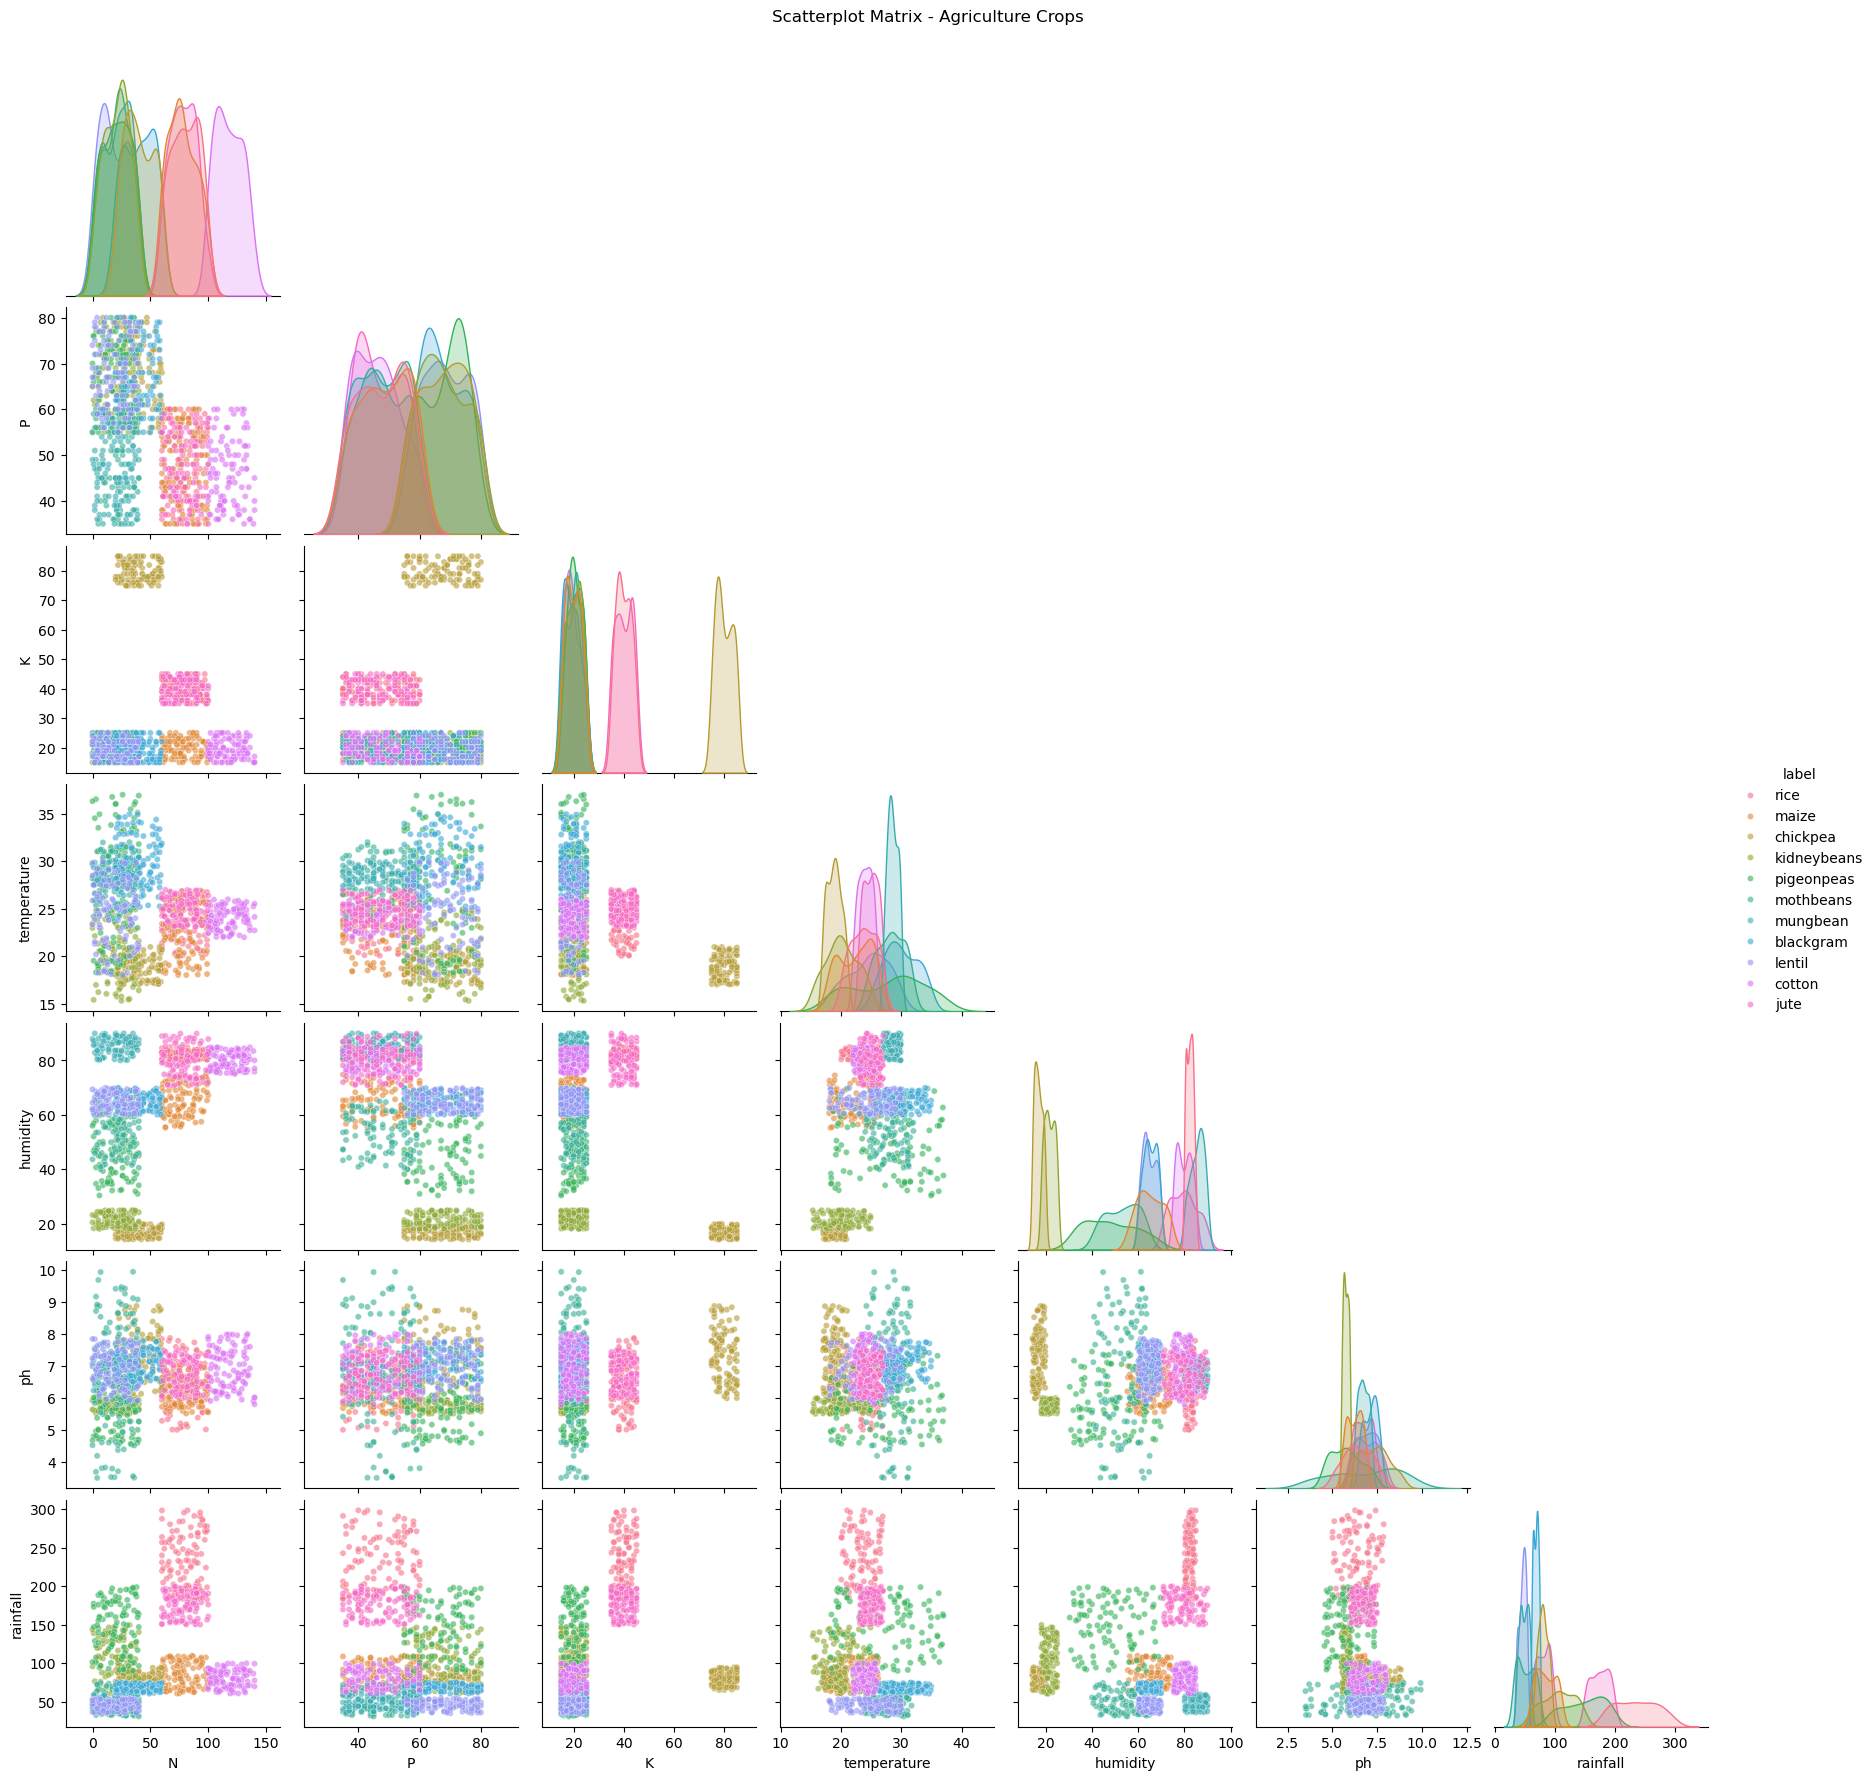

Plotting Horticulture Crop Matrix...


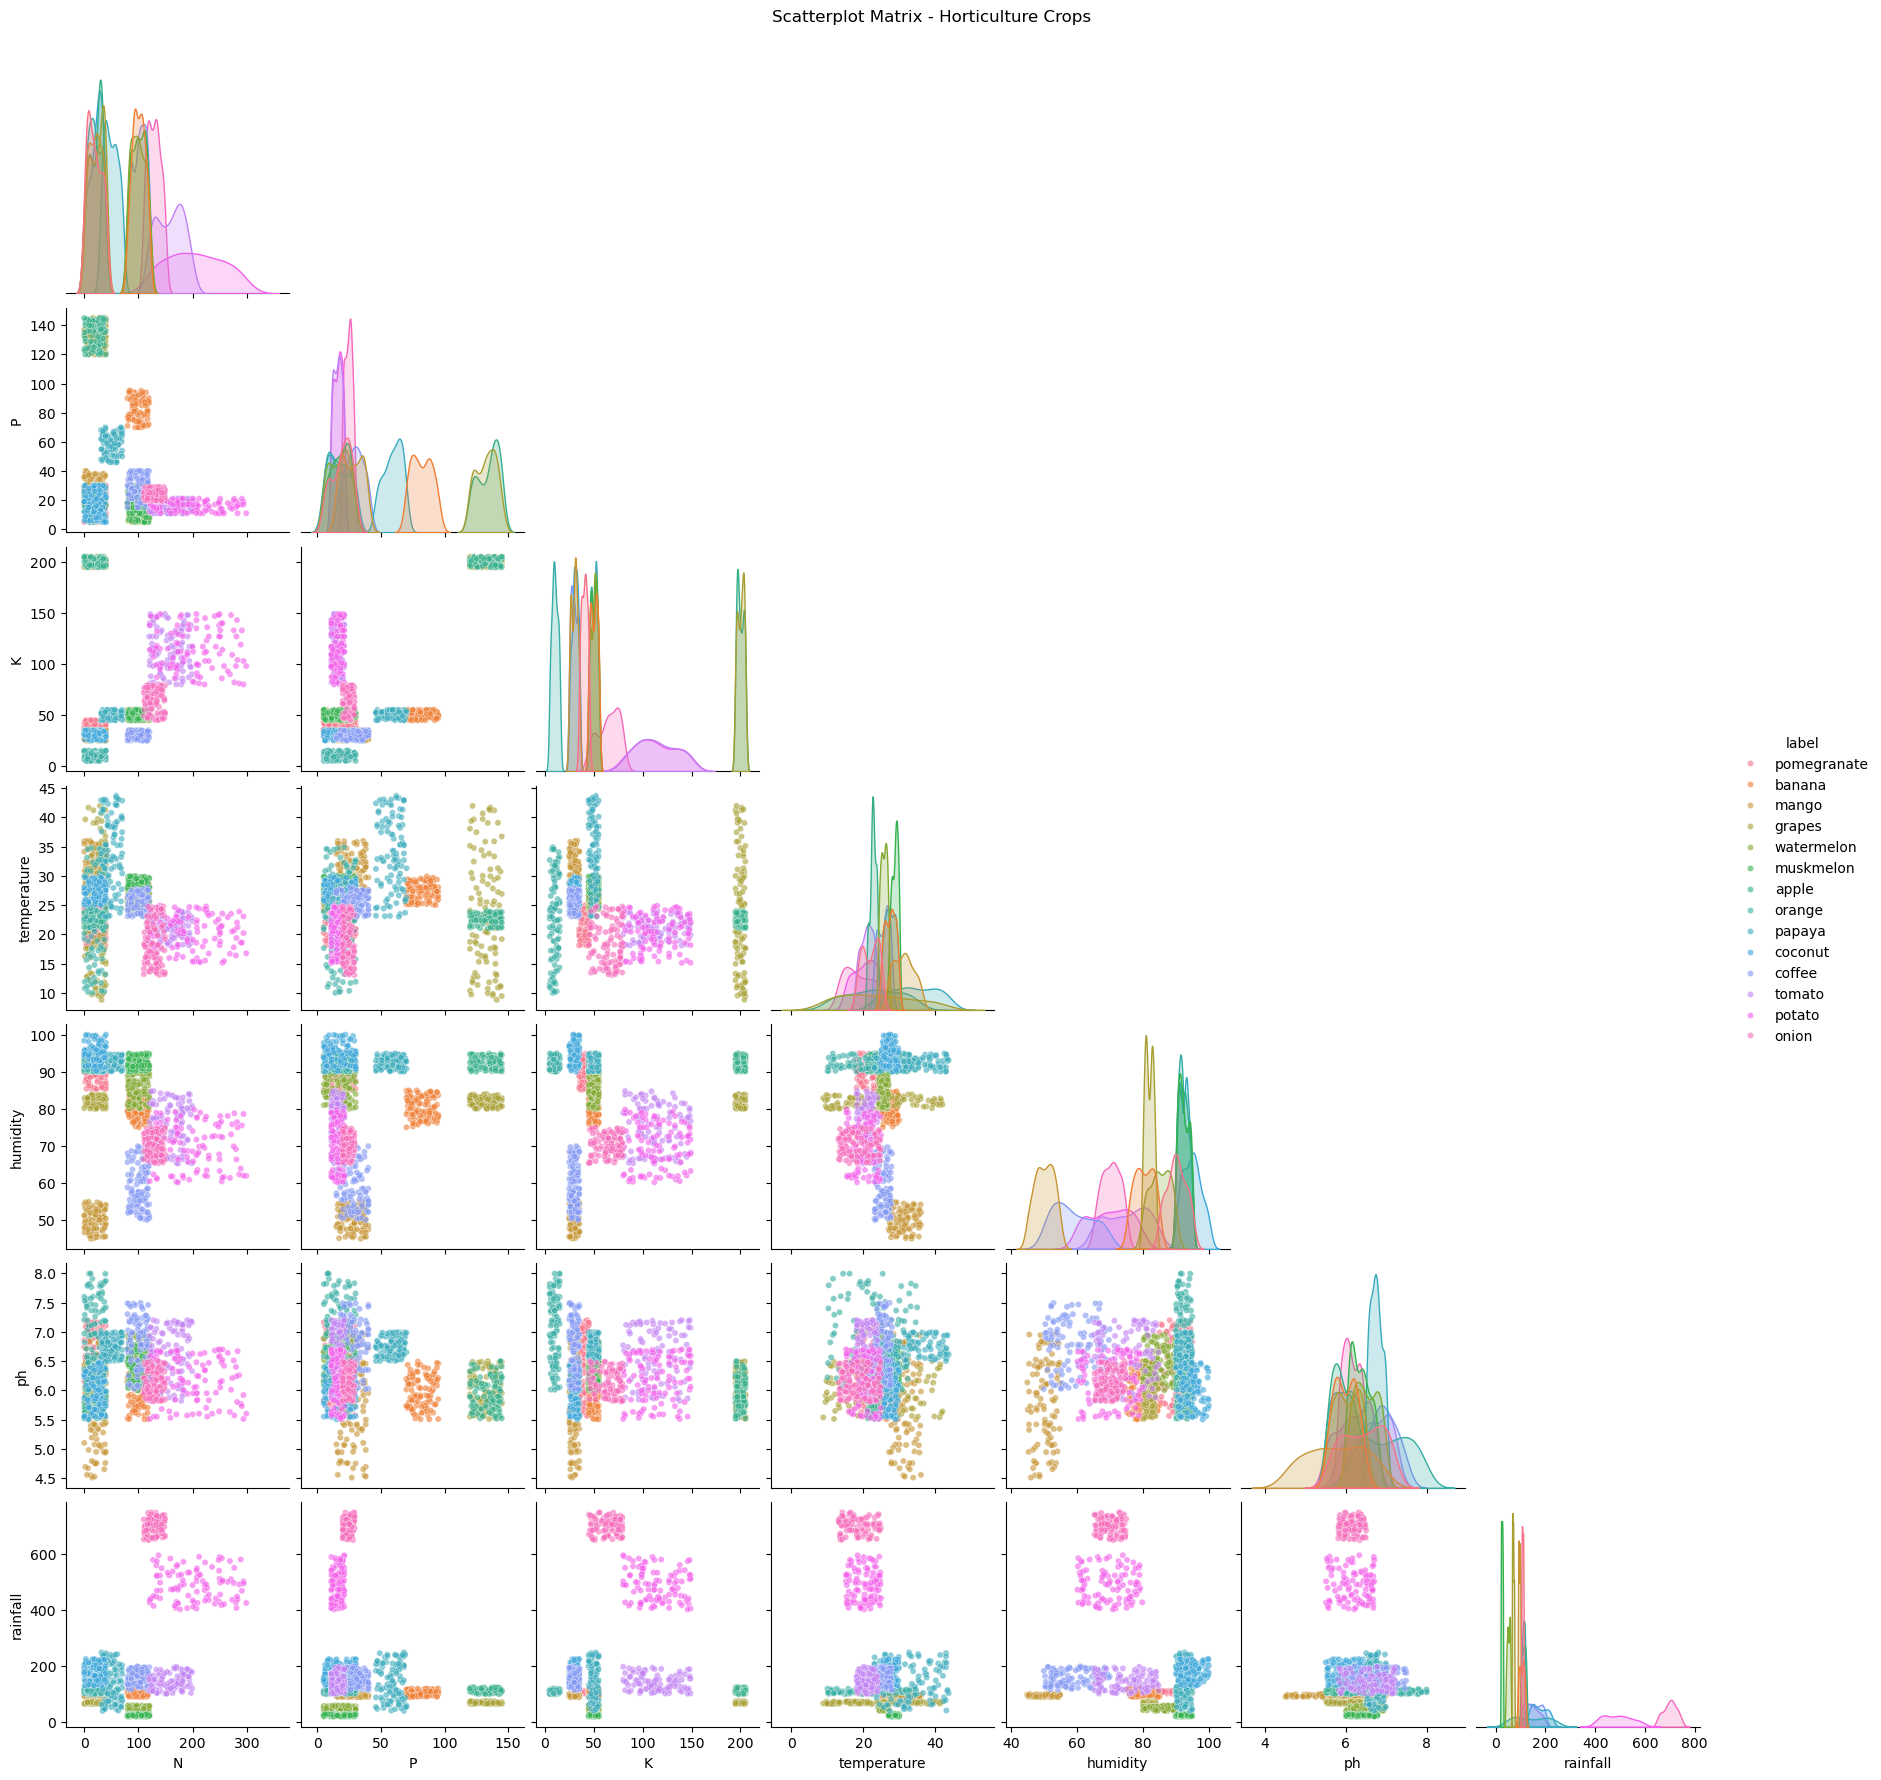

In [7]:
# Define agriculture and horticulture crops
agriculture_crops = [
    'rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
    'mothbeans', 'mungbean', 'blackgram', 'lentil',
    'cotton', 'jute'
]
horticulture_crops = [
    'pomegranate', 'banana', 'mango', 'grapes', 'watermelon',
    'muskmelon', 'apple', 'orange', 'papaya', 'coconut',
    'coffee', 'tomato', 'potato', 'onion'
]

# Filter datasets
df_agriculture = df[df['label'].isin(agriculture_crops)]
df_horticulture = df[df['label'].isin(horticulture_crops)]

# Plot: Agriculture crops
print("Plotting Agriculture Crop Matrix...")
sns.pairplot(df_agriculture, hue='label', plot_kws={'alpha': 0.6, 's': 20}, corner=True)
plt.suptitle("Scatterplot Matrix - Agriculture Crops", y=1.02)
plt.show()

# Plot: Horticulture crops
print("Plotting Horticulture Crop Matrix...")
sns.pairplot(df_horticulture, hue='label', plot_kws={'alpha': 0.6, 's': 20}, corner=True)
plt.suptitle("Scatterplot Matrix - Horticulture Crops", y=1.02)
plt.show()

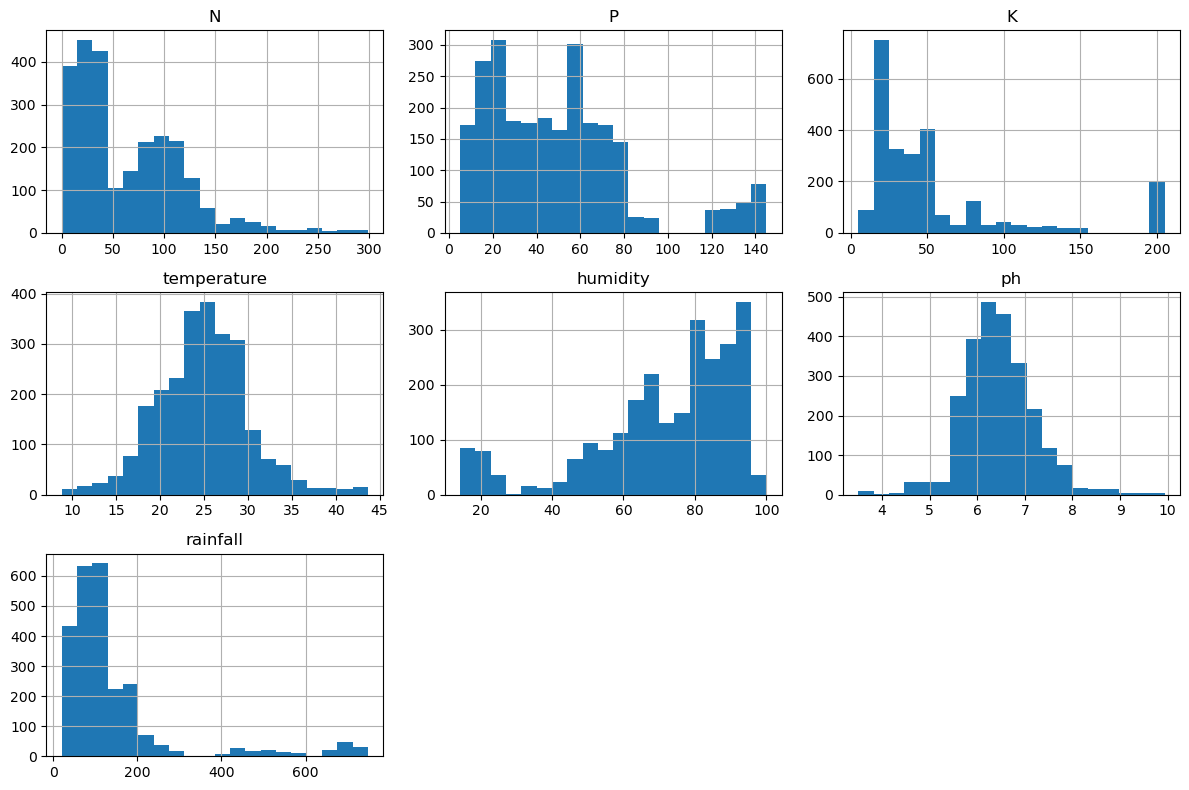

In [8]:
df.hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

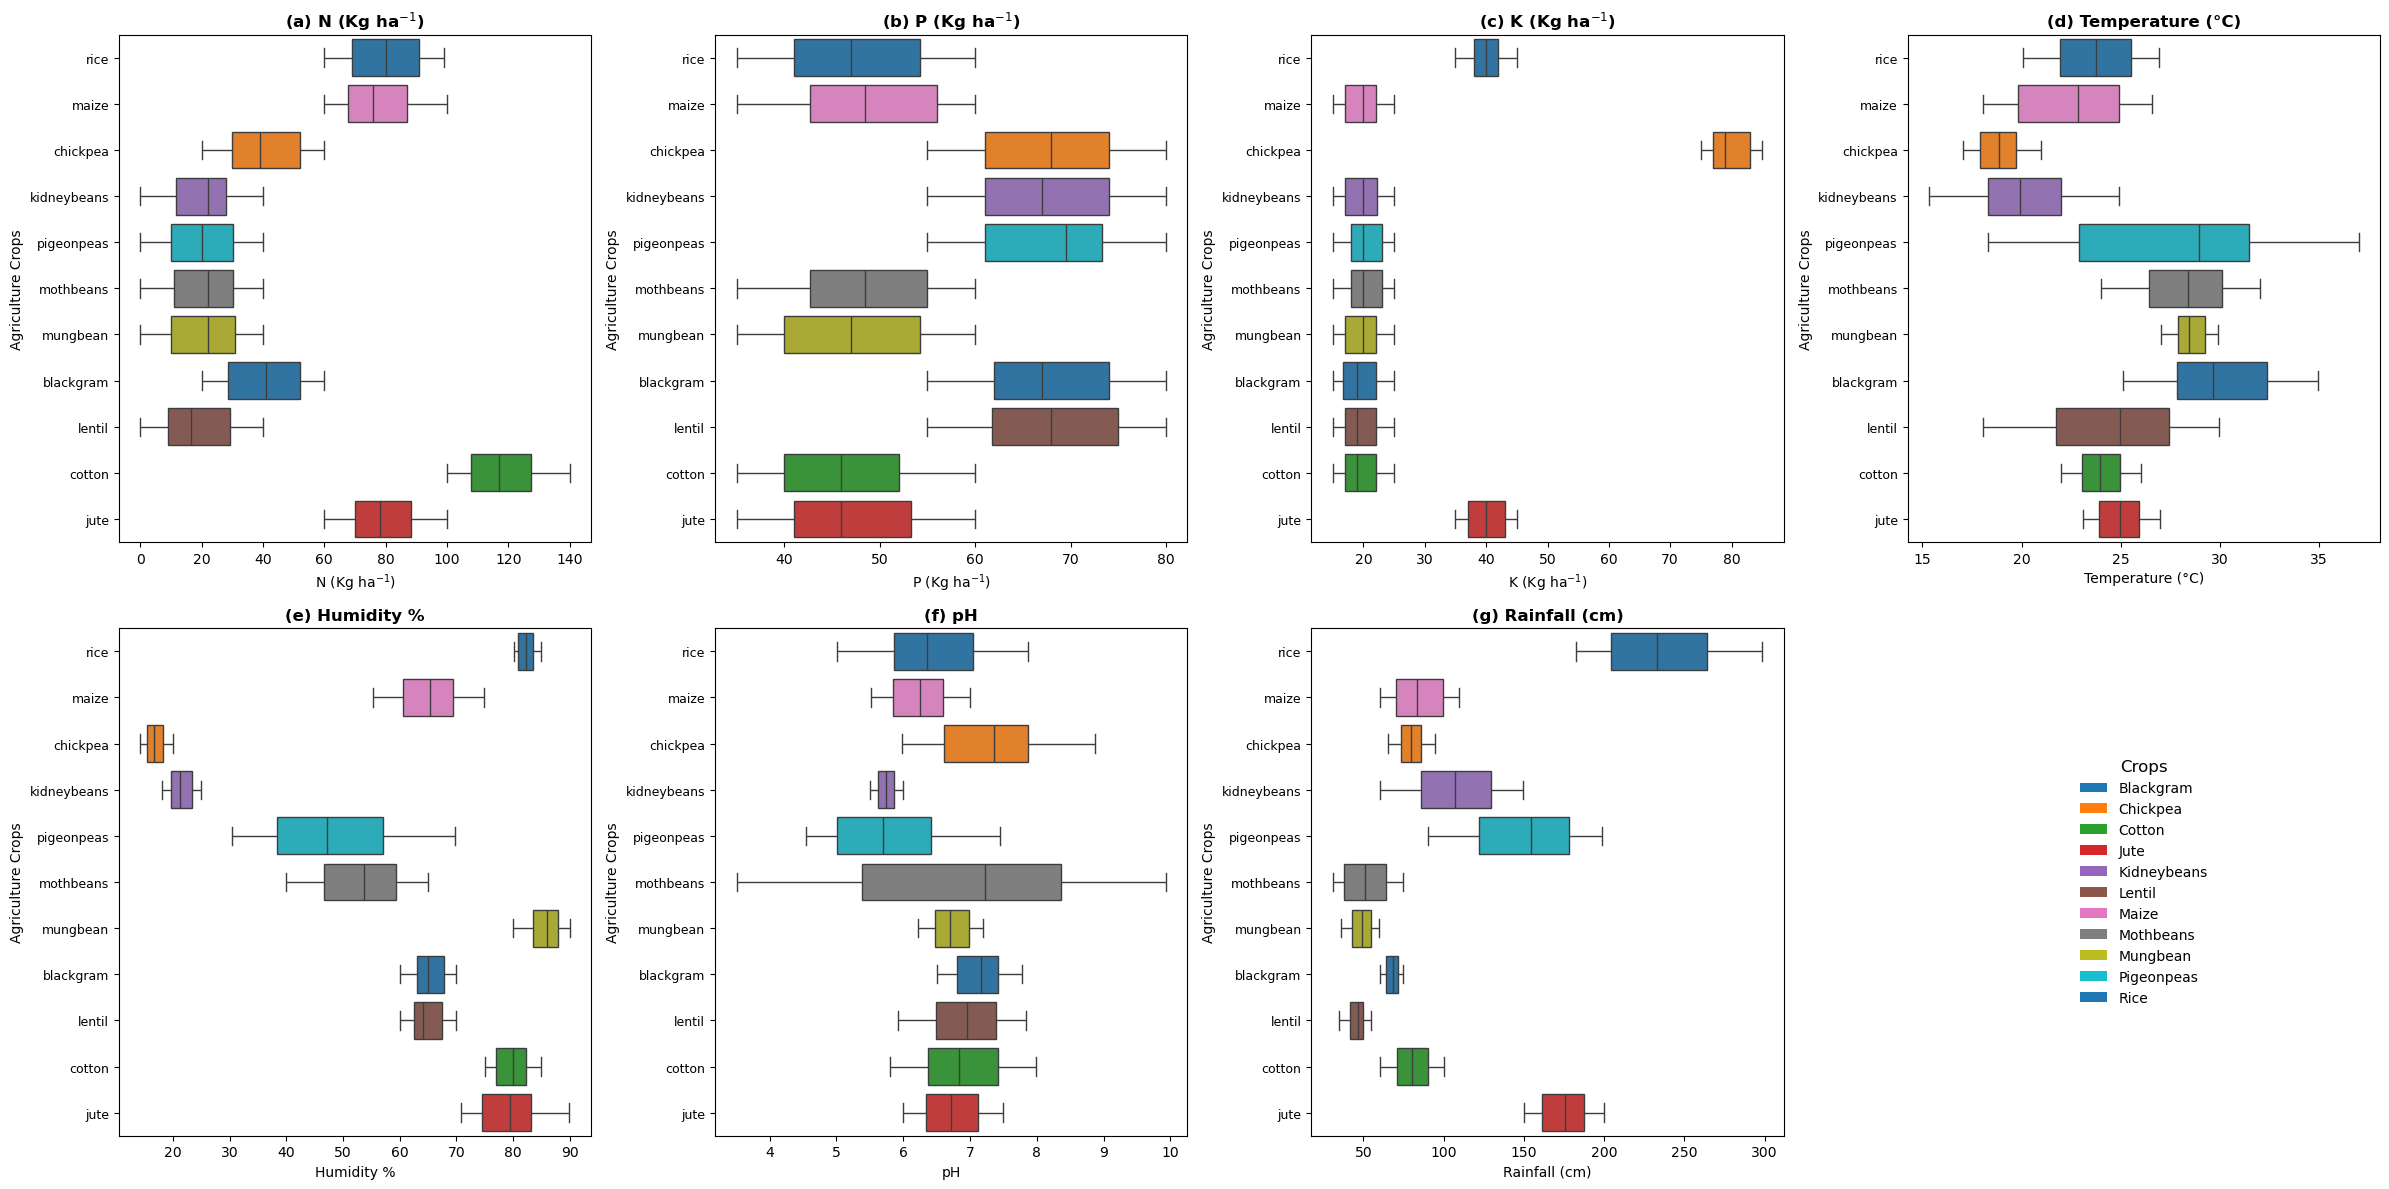

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Load dataset
df = pd.read_csv("combined_crop_dataset.csv")

# Define agriculture crops
agriculture_crops = [
    'rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
    'mothbeans', 'mungbean', 'blackgram', 'lentil', 'cotton', 'jute'
]

# Filter only agriculture crops
agriculture_df = df[df['label'].isin(agriculture_crops)]

# Sort crop list for consistent color mapping
agriculture_crops.sort()

# Use vibrant palette
palette = sns.color_palette("tab10", len(agriculture_crops))
color_dict = dict(zip(agriculture_crops, palette))

# Features to plot
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
feature_titles = {
    'N': r'N (Kg ha$^{-1}$)',
    'P': r'P (Kg ha$^{-1}$)',
    'K': r'K (Kg ha$^{-1}$)',
    'temperature': 'Temperature (°C)',
    'humidity': 'Humidity %',
    'ph': 'pH',
    'rainfall': 'Rainfall (cm)'
}

# Plotting
fig, axes = plt.subplots(2, 4, figsize=(24, 12))
axes = axes.flatten()

# Plot the 7 feature boxplots
for i, feature in enumerate(features):
    ax = axes[i]
    sns.boxplot(
        y='label', x=feature, data=agriculture_df,
        palette=color_dict, ax=ax
    )
    ax.set_title(f'({chr(97+i)}) {feature_titles[feature]}', fontsize=12, fontweight='bold')
    ax.set_xlabel(feature_titles[feature], fontsize=10)
    ax.set_ylabel("Agriculture Crops", fontsize=10)
    ax.tick_params(axis='y', labelsize=9)

# Use the 8th subplot for legend
legend_ax = axes[7]
legend_ax.axis('off')  # Hide axes

# Custom legend elements
legend_elements = [Patch(facecolor=color_dict[crop], label=crop.title()) for crop in agriculture_crops]

# Add legend inside the last subplot
legend_ax.legend(handles=legend_elements, loc='center', fontsize=10, title='Crops', title_fontsize=12, frameon=False)

plt.tight_layout()
plt.show()


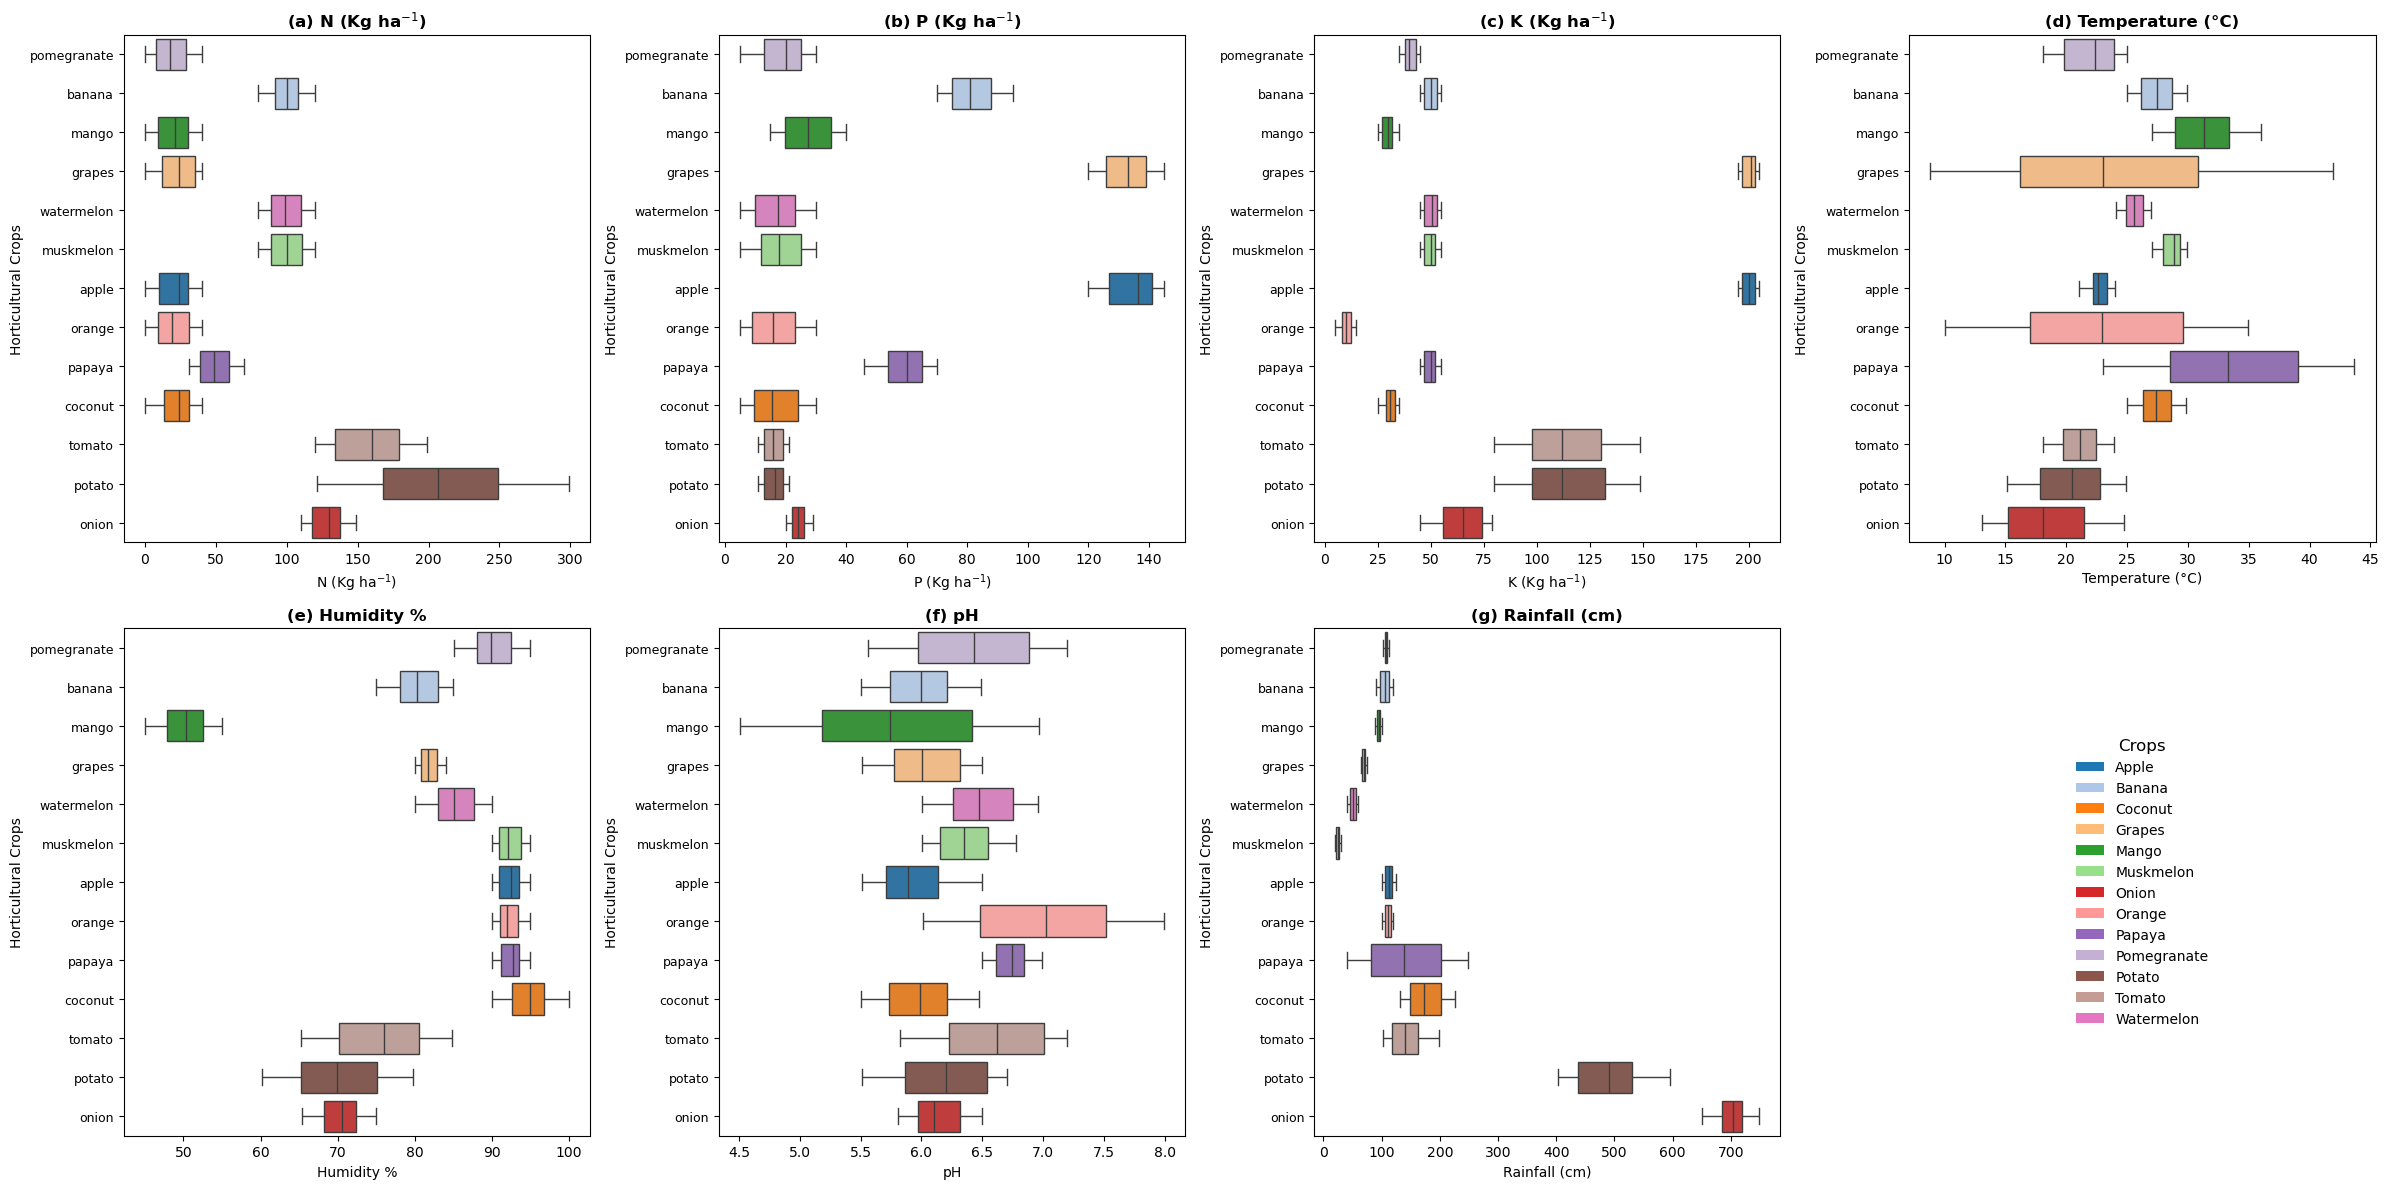

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Load dataset
df = pd.read_csv("combined_crop_dataset.csv")

# Define horticultural crops
horticulture_crops = [
    'pomegranate', 'banana', 'mango', 'grapes', 'watermelon', 'muskmelon',
    'apple', 'orange', 'papaya', 'coconut', 'tomato', 'onion', 'potato'
]

# Filter only horticultural crops
horticulture_df = df[df['label'].isin(horticulture_crops)]

# Sort for consistent colors
horticulture_crops.sort()

# Vibrant color palette
palette = sns.color_palette("tab20", len(horticulture_crops))
color_dict = dict(zip(horticulture_crops, palette))

# Features to plot
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
feature_titles = {
    'N': r'N (Kg ha$^{-1}$)',
    'P': r'P (Kg ha$^{-1}$)',
    'K': r'K (Kg ha$^{-1}$)',
    'temperature': 'Temperature (°C)',
    'humidity': 'Humidity %',
    'ph': 'pH',
    'rainfall': 'Rainfall (cm)'
}

# Plotting in a grid
fig, axes = plt.subplots(2, 4, figsize=(24, 12))
axes = axes.flatten()

# Plot 7 features
for i, feature in enumerate(features):
    ax = axes[i]
    sns.boxplot(
        y='label', x=feature, data=horticulture_df,
        palette=color_dict, ax=ax
    )
    ax.set_title(f'({chr(97+i)}) {feature_titles[feature]}', fontsize=12, fontweight='bold')
    ax.set_xlabel(feature_titles[feature], fontsize=10)
    ax.set_ylabel("Horticultural Crops", fontsize=10)
    ax.tick_params(axis='y', labelsize=9)

# Use the 8th subplot for legend
legend_ax = axes[7]
legend_ax.axis('off')  # Hide axes

# Create custom legend
legend_elements = [Patch(facecolor=color_dict[crop], label=crop.title()) for crop in horticulture_crops]
legend_ax.legend(handles=legend_elements, loc='center', title='Crops', fontsize=10, title_fontsize=12, frameon=False)

plt.tight_layout()
plt.show()


<Axes: >

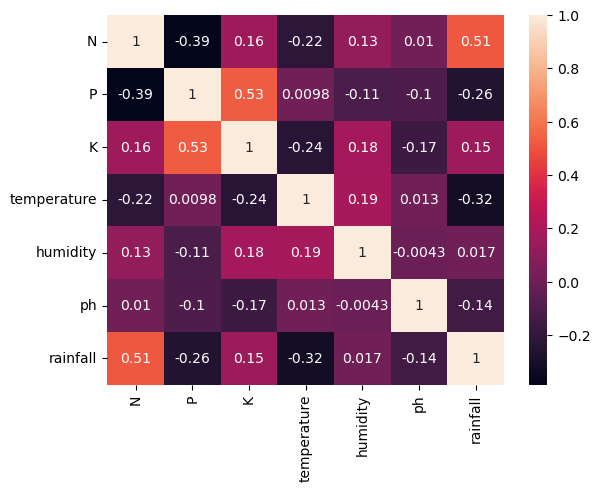

In [11]:
numeric_df = df.select_dtypes(include='number')  # Select numeric columns only
sns.heatmap(numeric_df.corr(), annot=True)

In [12]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [13]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [14]:
# Initializing empty lists to append all MODEL'S NAME and corresponding ACCURACY
accuracy = []
model = []

LOGISTIC REGRESSION

In [16]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.964
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        24
   blackgram       0.94      0.89      0.91        18
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       0.95      1.00      0.97        19
      cotton       0.85      1.00      0.92        17
      grapes       1.00      1.00      1.00        24
        jute       0.91      0.84      0.88        25
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.81      1.00      0.90        13
       maize       1.00      0.76      0.87        17
       mango       1.00      0.96      0.98        24
   mothbeans       0.85      0.94      0.89        18
    mungbean       1.00      0.85      0.92        20
   muskmelon       1.00      1.00      1.00        24
       onion       1.00      1.00      

Agriculture Crops Accuracy: 0.93
              precision    recall  f1-score   support

   blackgram       0.80      0.89      0.84        27
    chickpea       1.00      1.00      1.00        31
      cotton       0.93      0.90      0.92        31
        jute       0.96      0.89      0.92        27
 kidneybeans       0.97      1.00      0.98        32
      lentil       0.93      0.87      0.90        31
       maize       0.88      0.93      0.90        30
   mothbeans       0.90      0.85      0.88        33
    mungbean       1.00      1.00      1.00        31
  pigeonpeas       1.00      0.97      0.99        34
        rice       0.88      0.96      0.92        23

    accuracy                           0.93       330
   macro avg       0.93      0.93      0.93       330
weighted avg       0.94      0.93      0.93       330



<Figure size 1200x1000 with 0 Axes>

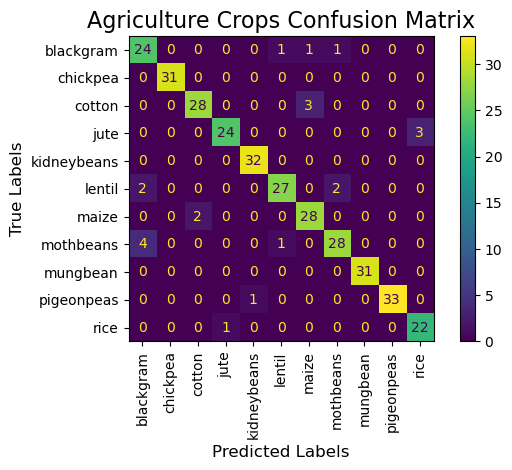

Horticulture Crops Accuracy: 1.00
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        25
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        27
      grapes       1.00      1.00      1.00        30
       mango       1.00      1.00      1.00        31
   muskmelon       1.00      1.00      1.00        33
       onion       1.00      1.00      1.00        28
      orange       1.00      1.00      1.00        24
      papaya       1.00      1.00      1.00        37
 pomegranate       1.00      1.00      1.00        29
      potato       1.00      1.00      1.00        32
      tomato       1.00      1.00      1.00        33
  watermelon       1.00      1.00      1.00        36

    accuracy                           1.00       420
   macro avg       1.00      1.00      1.00       420
weighted avg       1.00      1.00      1.00   

<Figure size 1200x1000 with 0 Axes>

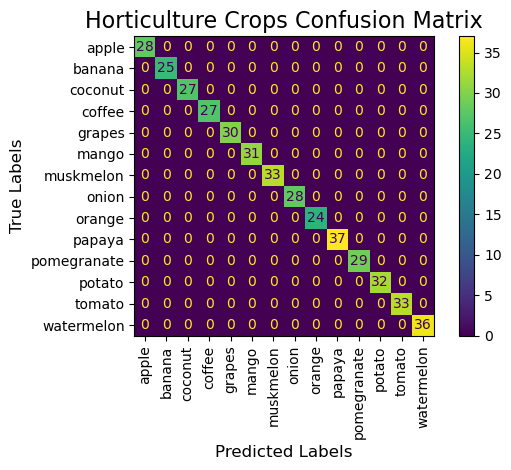

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

# Load dataset
df = pd.read_csv('combined_crop_dataset.csv')

# Define agriculture crops
agriculture_crops = [
    'rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
    'mothbeans', 'mungbean', 'blackgram', 'lentil', 'cotton', 'jute'
]

# Split the dataset
df_agriculture = df[df['label'].isin(agriculture_crops)]
df_horticulture = df[~df['label'].isin(agriculture_crops)]

# Function to train and generate confusion matrix
def train_and_plot_confusion_matrix(data, title):
    X = data.drop('label', axis=1)
    y = data['label']
    
    # Split data
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=2)
    
    # Train Logistic Regression model
    model = LogisticRegression(random_state=2, max_iter=200)
    model.fit(Xtrain, Ytrain)
    
    # Predict
    predicted_values = model.predict(Xtest)
    
    # Evaluation
    accuracy = accuracy_score(Ytest, predicted_values)
    print(f"{title} Accuracy: {accuracy:.2f}")
    print(classification_report(Ytest, predicted_values))
    
    # Confusion Matrix
    cm = confusion_matrix(Ytest, predicted_values, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    
    plt.figure(figsize=(12, 10))
    disp.plot(cmap='viridis', xticks_rotation=45)
    plt.title(f"{title} Confusion Matrix", fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=12)
    plt.ylabel('True Labels', fontsize=12)
    plt.xticks(rotation=90, ha='center', fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.show()

# Confusion matrix for Agriculture crops
train_and_plot_confusion_matrix(df_agriculture, "Agriculture Crops")

# Confusion matrix for Horticulture crops
train_and_plot_confusion_matrix(df_horticulture, "Horticulture Crops")


<Figure size 1200x1000 with 0 Axes>

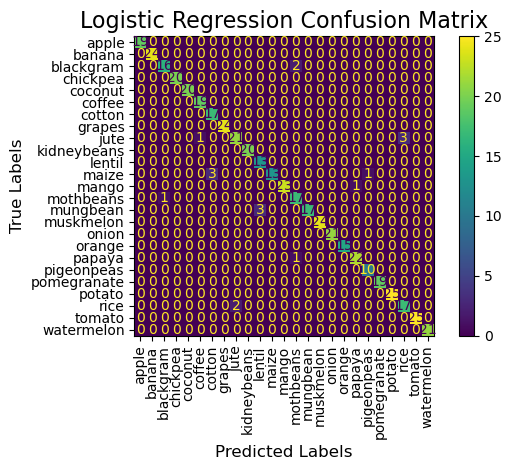

In [18]:
# Generate confusion matrix
cm = confusion_matrix(Ytest, predicted_values)

# Create confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LogReg.classes_)

# Increase figure size for better visibility
plt.figure(figsize=(12, 10))

# Plot confusion matrix with proper formatting
disp.plot(cmap='viridis', xticks_rotation=45)

# Adjust labels
plt.title("Logistic Regression Confusion Matrix", fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)

# Make sure to handle overlapping of labels
plt.xticks(rotation=90, ha='center', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Adjust layout to prevent clipping of labels
plt.tight_layout()
plt.show()


In [19]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.958, 0.962, 0.958, 0.972, 0.948])

In [20]:
# Binarize the multiclass labels
lb = LabelBinarizer()
target_bin = lb.fit_transform(target)
Ytest_bin = lb.transform(Ytest)

biases = []
variances = []
mses = []



for i, class_label in enumerate(lb.classes_):
    train_bin = target_bin[:, i]
    test_bin = Ytest_bin[:, i]

    # ⚠️ Check both train and test have at least 2 unique classes
    if len(np.unique(train_bin)) < 2 or len(np.unique(test_bin)) < 2:
        print(f"⚠️ Skipping class '{class_label}' due to insufficient variation in training or testing data.")
        continue

    try:
        mse, bias, var = bias_variance_decomp(
            LogisticRegression(random_state=2, max_iter=1000),
            Xtrain.values, train_bin,
            Xtest.values, test_bin,
            loss='0-1_loss',
            num_rounds=50,
            random_seed=1
        )

        print(f"Class: {class_label} | Bias: {bias:.4f}, Variance: {var:.4f}, MSE: {mse:.4f}")
    except ValueError as e:
        print(f"⚠️ Error for class '{class_label}': {e}")
        continue

    # Summary
print("\n📉 Average Bias:", np.mean(bias))
print("📈 Average Variance:", np.mean(var))
print("❌ Average MSE:", np.mean(mse))


Class: apple | Bias: 0.0380, Variance: 0.0000, MSE: 0.0380
Class: banana | Bias: 0.0480, Variance: 0.0000, MSE: 0.0480
Class: blackgram | Bias: 0.0360, Variance: 0.0000, MSE: 0.0360
Class: chickpea | Bias: 0.0400, Variance: 0.0000, MSE: 0.0400
Class: coconut | Bias: 0.0400, Variance: 0.0000, MSE: 0.0400
⚠️ Error for class 'coffee': This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0
Class: cotton | Bias: 0.0340, Variance: 0.0000, MSE: 0.0340
Class: grapes | Bias: 0.0480, Variance: 0.0000, MSE: 0.0480
⚠️ Error for class 'jute': This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0
Class: kidneybeans | Bias: 0.0400, Variance: 0.0000, MSE: 0.0400
Class: lentil | Bias: 0.0260, Variance: 0.0000, MSE: 0.0260
Class: maize | Bias: 0.0340, Variance: 0.0000, MSE: 0.0340
Class: mango | Bias: 0.0480, Variance: 0.0000, MSE: 0.0480
Class: mothbeans | Bias: 0.0360, Variance: 0.0000, MSE: 0.0360
Class: mung

In [21]:
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# RANDOM FOREST

In [24]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators=20, random_state=5)
RandomForest.fit(Xtrain,Ytrain)

predicted_values = RandomForest.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
model.append('RandomForest')
print("RandomF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RandomF's Accuracy is:  0.996
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        24
   blackgram       1.00      1.00      1.00        18
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        19
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        24
        jute       0.96      0.96      0.96        25
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        13
       maize       1.00      1.00      1.00        17
       mango       1.00      1.00      1.00        24
   mothbeans       1.00      1.00      1.00        18
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        24
       onion       1.00      1.00      1.00        

Agriculture Crops Accuracy: 0.98
              precision    recall  f1-score   support

   blackgram       1.00      1.00      1.00        27
    chickpea       1.00      1.00      1.00        31
      cotton       1.00      1.00      1.00        31
        jute       0.89      0.93      0.91        27
 kidneybeans       1.00      1.00      1.00        32
      lentil       0.97      1.00      0.98        31
       maize       1.00      1.00      1.00        30
   mothbeans       1.00      0.97      0.98        33
    mungbean       1.00      1.00      1.00        31
  pigeonpeas       1.00      1.00      1.00        34
        rice       0.91      0.87      0.89        23

    accuracy                           0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330



<Figure size 1200x1000 with 0 Axes>

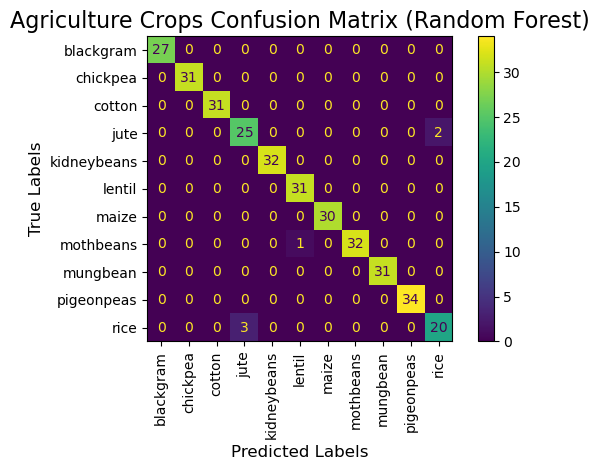

Horticulture Crops Accuracy: 1.00
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        25
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        27
      grapes       1.00      1.00      1.00        30
       mango       1.00      1.00      1.00        31
   muskmelon       1.00      1.00      1.00        33
       onion       1.00      1.00      1.00        28
      orange       1.00      1.00      1.00        24
      papaya       1.00      1.00      1.00        37
 pomegranate       1.00      1.00      1.00        29
      potato       1.00      1.00      1.00        32
      tomato       1.00      1.00      1.00        33
  watermelon       1.00      1.00      1.00        36

    accuracy                           1.00       420
   macro avg       1.00      1.00      1.00       420
weighted avg       1.00      1.00      1.00   

<Figure size 1200x1000 with 0 Axes>

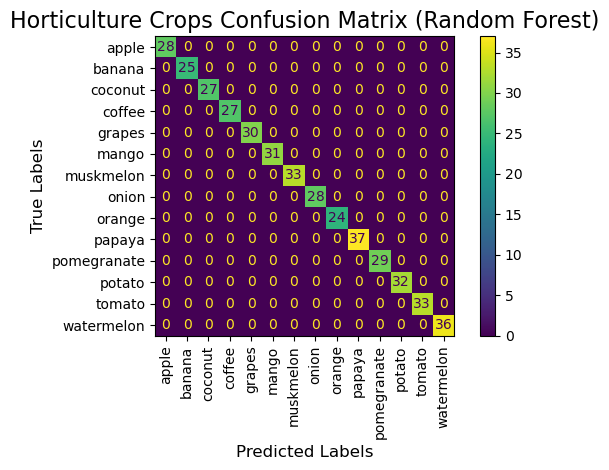

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

# Load dataset
df = pd.read_csv('combined_crop_dataset.csv')

# Define agriculture crops
agriculture_crops = [
    'rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
    'mothbeans', 'mungbean', 'blackgram', 'lentil', 'cotton', 'jute'
]

# Split dataset into agriculture and horticulture
df_agriculture = df[df['label'].isin(agriculture_crops)]
df_horticulture = df[~df['label'].isin(agriculture_crops)]

# Function to train Random Forest and plot confusion matrix
def train_and_plot_confusion_matrix_rf(data, title):
    X = data.drop('label', axis=1)
    y = data['label']
    
    # Split data
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=2)
    
    # Train model
    model = RandomForestClassifier(n_estimators=20, random_state=5)
    model.fit(Xtrain, Ytrain)
    
    # Predictions
    predicted_values = model.predict(Xtest)
    
    # Evaluation
    accuracy = accuracy_score(Ytest, predicted_values)
    print(f"{title} Accuracy: {accuracy:.2f}")
    print(classification_report(Ytest, predicted_values))
    
    # Confusion Matrix
    cm = confusion_matrix(Ytest, predicted_values, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    
    plt.figure(figsize=(12, 10))
    disp.plot(cmap='viridis', xticks_rotation=45)
    plt.title(f"{title} Confusion Matrix (Random Forest)", fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=12)
    plt.ylabel('True Labels', fontsize=12)
    plt.xticks(rotation=90, ha='center', fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.show()

# Run for both crop categories
train_and_plot_confusion_matrix_rf(df_agriculture, "Agriculture Crops")
train_and_plot_confusion_matrix_rf(df_horticulture, "Horticulture Crops")


<Figure size 1200x1000 with 0 Axes>

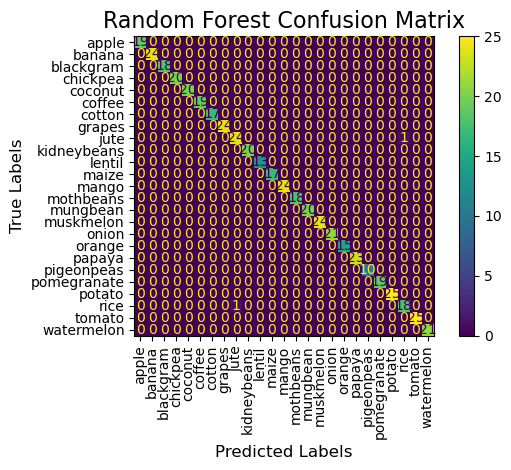

In [26]:
# Generate confusion matrix
cm = confusion_matrix(Ytest, predicted_values)

# Create confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RandomForest.classes_)

# Increase figure size for better visibility
plt.figure(figsize=(12, 10))

# Plot confusion matrix with proper formatting
disp.plot(cmap='viridis', xticks_rotation=45)

# Adjust labels
plt.title("Random Forest Confusion Matrix", fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)

# Make sure to handle overlapping of labels
plt.xticks(rotation=90, ha='center', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Adjust layout to prevent clipping of labels
plt.tight_layout()
plt.show()


In [27]:
# Cross validation score (Random Forest)
score = cross_val_score(RandomForest,features,target,cv=5)
score

array([0.996, 0.996, 0.996, 0.996, 0.988])

In [28]:
# Binarize the multiclass labels
lb = LabelBinarizer()
target_bin = lb.fit_transform(target)
Ytest_bin = lb.transform(Ytest)

biases = []
variances = []
mses = []

print("\n🧠 Bias-Variance Decomposition for each class:")
for i, class_label in enumerate(lb.classes_):
    train_bin = target_bin[:, i]
    test_bin = Ytest_bin[:, i]

    # Skip if not enough class variation
    if len(np.unique(train_bin)) < 2 or len(np.unique(test_bin)) < 2:
        print(f"⚠️ Skipping class '{class_label}' (insufficient variation)")
        continue

    mse, bias, var = bias_variance_decomp(
        RandomForestClassifier(n_estimators=20, random_state=5),
        Xtrain.values, train_bin,
        Xtest.values, test_bin,
        loss='0-1_loss',
        num_rounds=50,
        random_seed=1
    )

    print(f"Class: {class_label} | Bias: {bias:.4f}, Variance: {var:.4f}, MSE: {mse:.4f}")
    biases.append(bias)
    variances.append(var)
    mses.append(mse)

# Summary
print("\n📉 Average Bias:", np.mean(biases))
print("📈 Average Variance:", np.mean(variances))
print("❌ Average MSE:", np.mean(mses))


🧠 Bias-Variance Decomposition for each class:
Class: apple | Bias: 0.0380, Variance: 0.0020, MSE: 0.0395
Class: banana | Bias: 0.0480, Variance: 0.0018, MSE: 0.0498
Class: blackgram | Bias: 0.0360, Variance: 0.0012, MSE: 0.0372
Class: chickpea | Bias: 0.0400, Variance: 0.0014, MSE: 0.0414
Class: coconut | Bias: 0.0400, Variance: 0.0008, MSE: 0.0404
Class: coffee | Bias: 0.0380, Variance: 0.0000, MSE: 0.0380
Class: cotton | Bias: 0.0360, Variance: 0.0026, MSE: 0.0371
Class: grapes | Bias: 0.0480, Variance: 0.0019, MSE: 0.0495
Class: jute | Bias: 0.0500, Variance: 0.0000, MSE: 0.0500
Class: kidneybeans | Bias: 0.0400, Variance: 0.0013, MSE: 0.0411
Class: lentil | Bias: 0.0260, Variance: 0.0058, MSE: 0.0318
Class: maize | Bias: 0.0340, Variance: 0.0015, MSE: 0.0355
Class: mango | Bias: 0.0480, Variance: 0.0031, MSE: 0.0486
Class: mothbeans | Bias: 0.0360, Variance: 0.0031, MSE: 0.0391
Class: mungbean | Bias: 0.0400, Variance: 0.0027, MSE: 0.0427
Class: muskmelon | Bias: 0.0480, Variance:

In [29]:
# Dump the trained Naive Bayes classifier with Pickle
RandomForest_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RandomForest_Model_pkl = open(RandomForest_pkl_filename, 'wb')
pickle.dump(RandomForest, RandomForest_Model_pkl)
# Close the pickle instances
RandomForest_Model_pkl.close()

# DECISION TREE

In [31]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  89.8
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        24
   blackgram       0.85      0.94      0.89        18
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        19
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        24
        jute       0.75      0.12      0.21        25
 kidneybeans       0.00      0.00      0.00        20
      lentil       0.91      0.77      0.83        13
       maize       0.77      1.00      0.87        17
       mango       1.00      1.00      1.00        24
   mothbeans       0.82      0.78      0.80        18
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        24
       onion       1.00      1.00      1.00   

Agriculture Crops Accuracy: 96.06%
              precision    recall  f1-score   support

   blackgram       1.00      0.81      0.90        27
    chickpea       1.00      1.00      1.00        31
      cotton       1.00      0.97      0.98        31
        jute       1.00      0.85      0.92        27
 kidneybeans       1.00      1.00      1.00        32
      lentil       0.88      0.97      0.92        31
       maize       0.94      1.00      0.97        30
   mothbeans       0.91      0.94      0.93        33
    mungbean       1.00      1.00      1.00        31
  pigeonpeas       1.00      1.00      1.00        34
        rice       0.85      1.00      0.92        23

    accuracy                           0.96       330
   macro avg       0.96      0.96      0.96       330
weighted avg       0.96      0.96      0.96       330



<Figure size 1200x1000 with 0 Axes>

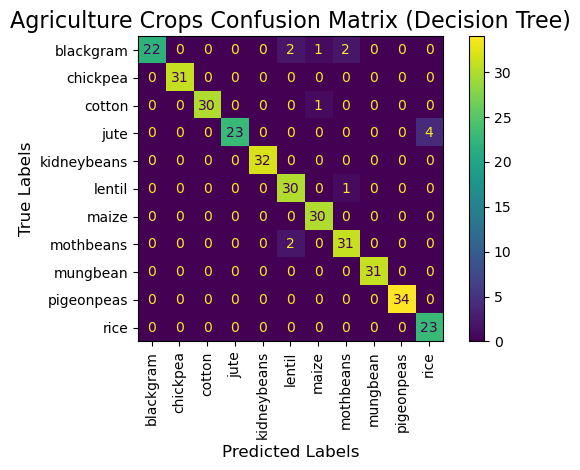

Horticulture Crops Accuracy: 100.00%
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        25
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        27
      grapes       1.00      1.00      1.00        30
       mango       1.00      1.00      1.00        31
   muskmelon       1.00      1.00      1.00        33
       onion       1.00      1.00      1.00        28
      orange       1.00      1.00      1.00        24
      papaya       1.00      1.00      1.00        37
 pomegranate       1.00      1.00      1.00        29
      potato       1.00      1.00      1.00        32
      tomato       1.00      1.00      1.00        33
  watermelon       1.00      1.00      1.00        36

    accuracy                           1.00       420
   macro avg       1.00      1.00      1.00       420
weighted avg       1.00      1.00      1.00

<Figure size 1200x1000 with 0 Axes>

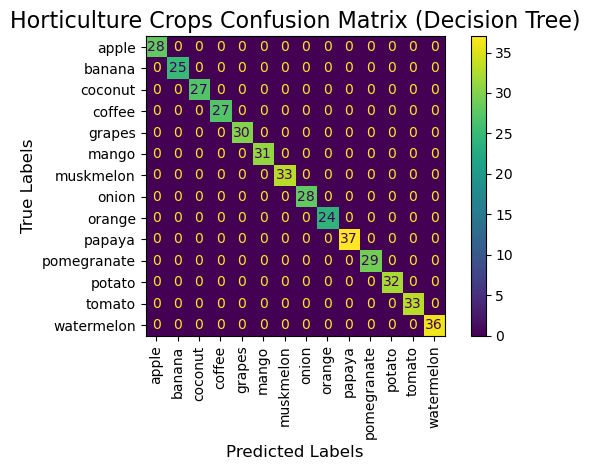

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

# Load dataset
df = pd.read_csv('combined_crop_dataset.csv')

# Define agriculture crops
agriculture_crops = [
    'rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
    'mothbeans', 'mungbean', 'blackgram', 'lentil', 'cotton', 'jute'
]

# Split dataset into agriculture and horticulture
df_agriculture = df[df['label'].isin(agriculture_crops)]
df_horticulture = df[~df['label'].isin(agriculture_crops)]

# Function to train Decision Tree and plot confusion matrix
def train_and_plot_confusion_matrix_dt(data, title):
    X = data.drop('label', axis=1)
    y = data['label']
    
    # Split data
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=2)
    
    # Train model
    model = DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5)
    model.fit(Xtrain, Ytrain)
    
    # Predictions
    predicted_values = model.predict(Xtest)
    
    # Evaluation
    accuracy = accuracy_score(Ytest, predicted_values)
    print(f"{title} Accuracy: {accuracy * 100:.2f}%")
    print(classification_report(Ytest, predicted_values))
    
    # Confusion Matrix
    cm = confusion_matrix(Ytest, predicted_values, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    
    plt.figure(figsize=(12, 10))
    disp.plot(cmap='viridis', xticks_rotation=45)
    plt.title(f"{title} Confusion Matrix (Decision Tree)", fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=12)
    plt.ylabel('True Labels', fontsize=12)
    plt.xticks(rotation=90, ha='center', fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.show()

# Run for both crop categories
train_and_plot_confusion_matrix_dt(df_agriculture, "Agriculture Crops")
train_and_plot_confusion_matrix_dt(df_horticulture, "Horticulture Crops")


<Figure size 1200x1000 with 0 Axes>

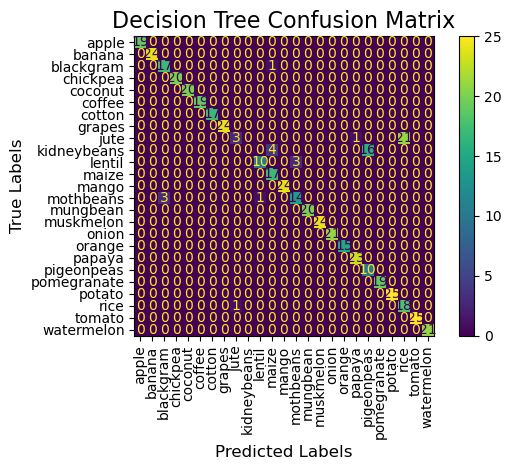

In [33]:
# Assuming you already have the confusion matrix and predicted values
cm = confusion_matrix(Ytest, predicted_values)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DecisionTree.classes_)

# Increase figure size for better visibility
plt.figure(figsize=(12, 10))

# Plot confusion matrix
disp.plot(cmap='viridis', xticks_rotation=45)

# Adjust labels
plt.title("Decision Tree Confusion Matrix", fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)

# Make sure to handle overlapping of labels
plt.xticks(rotation=90, ha='center', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Adjust layout to prevent clipping of labels
plt.tight_layout()
plt.show()

In [34]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.946, 0.926, 0.88 , 0.886, 0.874])

In [35]:
# Binarize labels for multiclass one-vs-rest decomposition
lb = LabelBinarizer()
target_bin = lb.fit_transform(target)
Ytest_bin = lb.transform(Ytest)

biases = []
variances = []
mses = []

print("\n🧠 Bias-Variance Decomposition for each class:")
for i, class_label in enumerate(lb.classes_):
    train_bin = target_bin[:, i]
    test_bin = Ytest_bin[:, i]

    # Skip if not enough variation in class
    if len(np.unique(train_bin)) < 2 or len(np.unique(test_bin)) < 2:
        print(f"⚠️ Skipping class '{class_label}' (insufficient variation)")
        continue

    mse, bias, var = bias_variance_decomp(
        DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5),
        Xtrain.values, train_bin,
        Xtest.values, test_bin,
        loss='0-1_loss', num_rounds=50, random_seed=1
    )
    print(f"Class: {class_label} | Bias: {bias:.4f}, Variance: {var:.4f}, MSE: {mse:.4f}")
    biases.append(bias)
    variances.append(var)
    mses.append(mse)

# Overall Averages
print("\n📉 Average Bias:", np.mean(biases))
print("📈 Average Variance:", np.mean(variances))
print("❌ Average MSE:", np.mean(mses))


🧠 Bias-Variance Decomposition for each class:
Class: apple | Bias: 0.0380, Variance: 0.0080, MSE: 0.0453
Class: banana | Bias: 0.0480, Variance: 0.0093, MSE: 0.0572
Class: blackgram | Bias: 0.0360, Variance: 0.0056, MSE: 0.0413
Class: chickpea | Bias: 0.0400, Variance: 0.0105, MSE: 0.0497
Class: coconut | Bias: 0.0400, Variance: 0.0082, MSE: 0.0471
Class: coffee | Bias: 0.0380, Variance: 0.0000, MSE: 0.0380
Class: cotton | Bias: 0.0340, Variance: 0.0075, MSE: 0.0412
Class: grapes | Bias: 0.0480, Variance: 0.0100, MSE: 0.0570
Class: jute | Bias: 0.0500, Variance: 0.0000, MSE: 0.0500
Class: kidneybeans | Bias: 0.0400, Variance: 0.0058, MSE: 0.0456
Class: lentil | Bias: 0.0260, Variance: 0.0136, MSE: 0.0392
Class: maize | Bias: 0.0340, Variance: 0.0079, MSE: 0.0419
Class: mango | Bias: 0.0480, Variance: 0.0098, MSE: 0.0537
Class: mothbeans | Bias: 0.0360, Variance: 0.0085, MSE: 0.0439
Class: mungbean | Bias: 0.0400, Variance: 0.0095, MSE: 0.0491
Class: muskmelon | Bias: 0.0480, Variance:

In [36]:
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# ACCURACY COMPARISSION

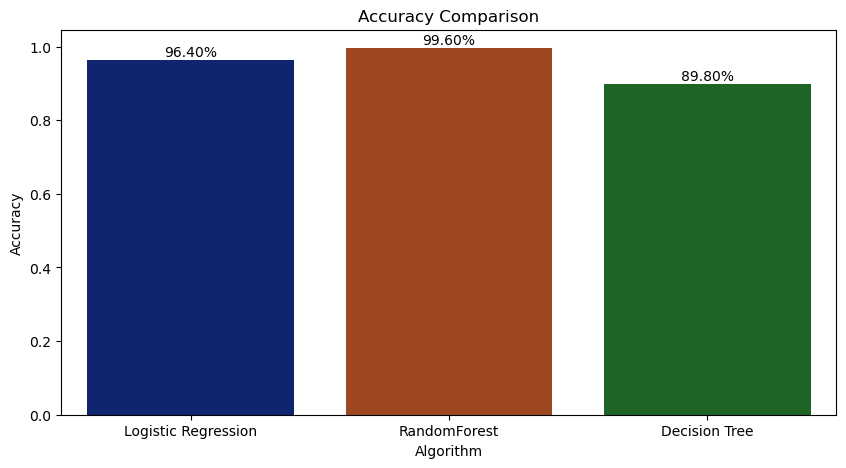

In [38]:
plt.figure(figsize=[10, 5], dpi=100)
plt.title('Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
sns.barplot(x=model, y=accuracy, palette='dark')

# Add accuracy percentages above each bar
for i, accuracy in enumerate(accuracy):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2%}', ha='center')

plt.show()

# PREDICTION

In [40]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RandomForest.predict(data)
print(prediction)

['coffee']


In [41]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RandomForest.predict(data)
print(prediction)

['coffee']


In [42]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = DecisionTree.predict(data)
print(prediction)

['rice']


In [43]:
# Separate features and target
X = df.drop('label', axis=1)
y = df['label']
# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print('Training set:', X_train.shape, y_train.shape)
print('Testing set:', X_test.shape, y_test.shape)

Training set: (2000, 7) (2000,)
Testing set: (500, 7) (500,)


# Accuracy of Logistic Regression Model for each crop

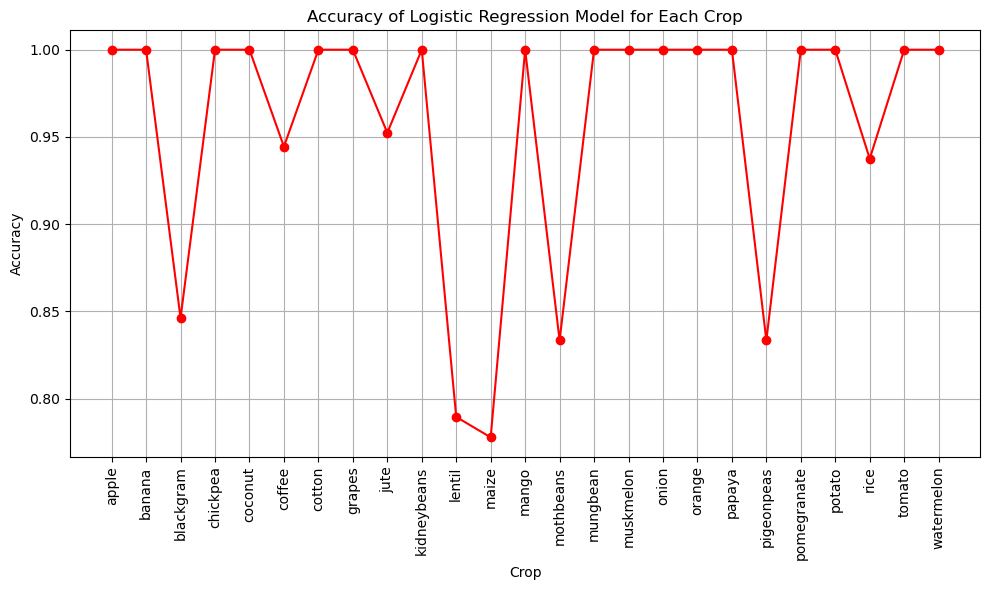

In [45]:
# Initialize and train the Logistic Regression model
LR_model = LogisticRegression(random_state=2)
LR_model.fit(X_train, y_train)

# Predict crop labels for the testing set
predicted_labels = LR_model.predict(X_test)

# Calculate accuracy for each crop
accuracy_per_crop = []
crop_labels = le.inverse_transform(sorted(np.unique(y_test)))  # Get sorted unique crop labels
for crop_label in crop_labels:
    indices = (y_test == le.transform([crop_label])[0])  # Indices for current crop label
    accuracy = accuracy_score(y_test[indices], predicted_labels[indices])
    accuracy_per_crop.append(accuracy)

# Plot the accuracy of the Logistic Regression model for each crop
plt.figure(figsize=(10, 6))
plt.plot(crop_labels, accuracy_per_crop, marker='o', color='red', linestyle='-')
plt.xticks(rotation=90)
plt.title('Accuracy of Logistic Regression Model for Each Crop')
plt.ylabel('Accuracy')
plt.xlabel('Crop')
plt.grid(True)
plt.tight_layout()
plt.show()


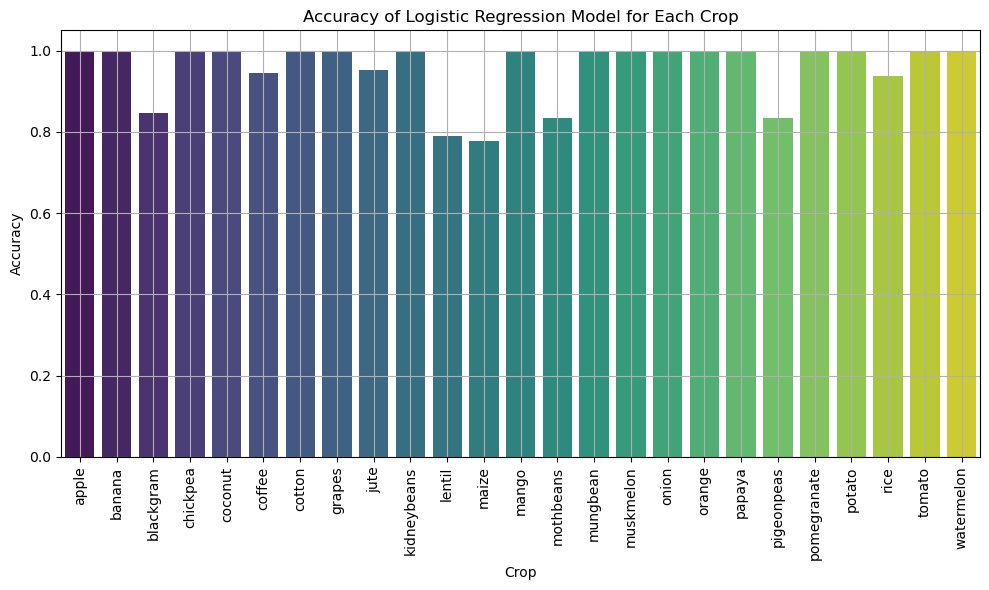

In [46]:
# Initialize and train the Logistic Regression model
LR_model = LogisticRegression(random_state=2)
LR_model.fit(X_train, y_train)

# Predict crop labels for the testing set
predicted_labels = LR_model.predict(X_test)

# Calculate accuracy for each crop
accuracy_per_crop = []
crop_labels = le.inverse_transform(sorted(np.unique(y_test)))  # Get sorted unique crop labels
for crop_label in crop_labels:
    indices = (y_test == le.transform([crop_label])[0])  # Indices for current crop label
    accuracy = accuracy_score(y_test[indices], predicted_labels[indices])
    accuracy_per_crop.append(accuracy)

# Plot the accuracy of the Logistic Regression model for each crop
plt.figure(figsize=(10, 6))
sns.barplot(x=crop_labels, y=accuracy_per_crop, palette='viridis')
plt.xticks(rotation=90)
plt.title('Accuracy of Logistic Regression Model for Each Crop')
plt.ylabel('Accuracy')
plt.xlabel('Crop')
plt.grid(True)
plt.tight_layout()
plt.show()

# Accuracy of RANDOM FOREST Model for each crop

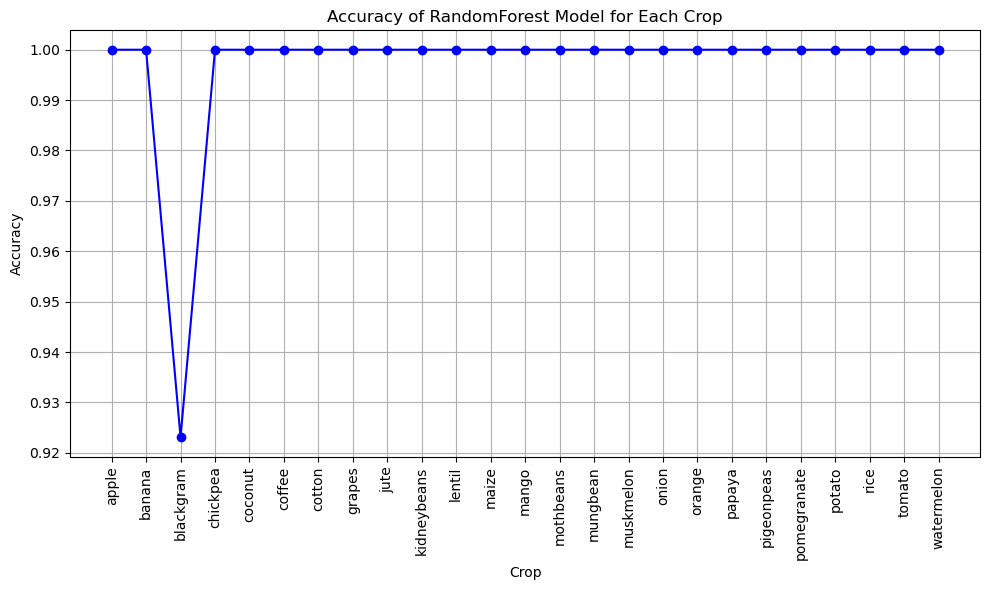

In [48]:
# Initialize and train the RandomForest model
RandomForest_model = RandomForestClassifier(n_estimators=20, random_state=5)
RandomForest_model.fit(X_train, y_train)

# Predict crop labels for the testing set
predicted_labels = RandomForest_model.predict(X_test)

# Calculate accuracy for each crop
accuracy_per_crop = []
crop_labels = le.inverse_transform(sorted(np.unique(y_test)))  # Get sorted unique crop labels
for crop_label in crop_labels:
    indices = (y_test == le.transform([crop_label])[0])  # Indices for current crop label
    accuracy = accuracy_score(y_test[indices], predicted_labels[indices])
    accuracy_per_crop.append(accuracy)

# Plot the accuracy of the RandomForest model for each crop
plt.figure(figsize=(10, 6))
plt.plot(crop_labels, accuracy_per_crop, marker='o', color='blue', linestyle='-')
plt.xticks(rotation=90)
plt.title('Accuracy of RandomForest Model for Each Crop')
plt.ylabel('Accuracy')
plt.xlabel('Crop')
#plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for better visualization
plt.grid(True)
plt.tight_layout()
plt.show()

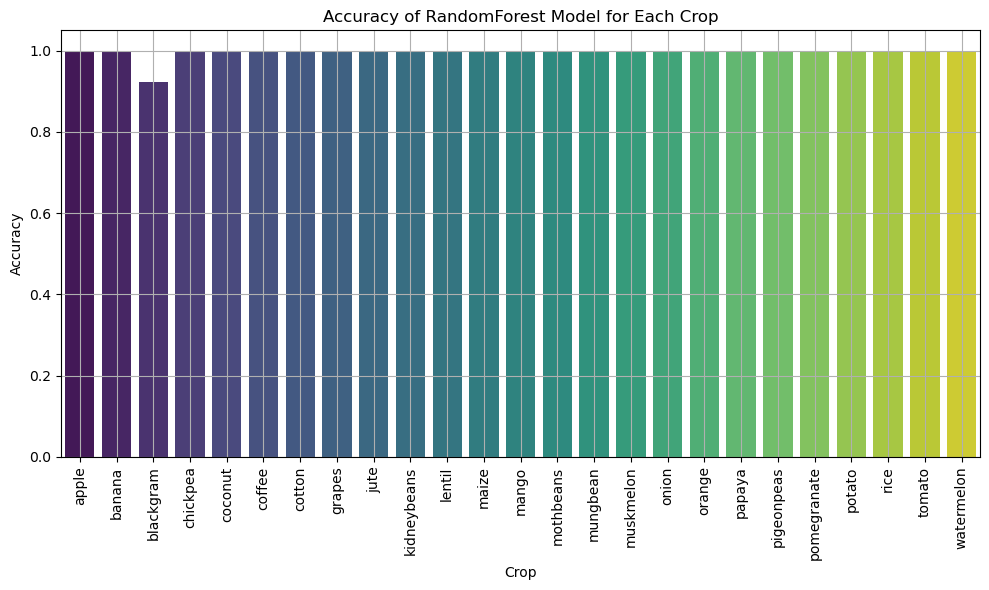

In [49]:
# Initialize and train the RandomForest model
RandomForest_model = RandomForestClassifier(n_estimators=20, random_state=5)
RandomForest_model.fit(X_train, y_train)

# Predict crop labels for the testing set
predicted_labels = RandomForest_model.predict(X_test)

# Calculate accuracy for each crop
accuracy_per_crop = []
crop_labels = le.inverse_transform(sorted(np.unique(y_test)))  # Get sorted unique crop labels
for crop_label in crop_labels:
    indices = (y_test == le.transform([crop_label])[0])  # Indices for current crop label
    accuracy = accuracy_score(y_test[indices], predicted_labels[indices])
    accuracy_per_crop.append(accuracy)

# Plot the accuracy of the RandomForest model for each crop
plt.figure(figsize=(10, 6))
sns.barplot(x=crop_labels, y=accuracy_per_crop, palette='viridis')
plt.xticks(rotation=90)
plt.title('Accuracy of RandomForest Model for Each Crop')
plt.ylabel('Accuracy')
plt.xlabel('Crop')
#plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for better visualization
plt.grid(True)
plt.tight_layout()
plt.show()

# Accuracy of Decision Tree Model for each crop

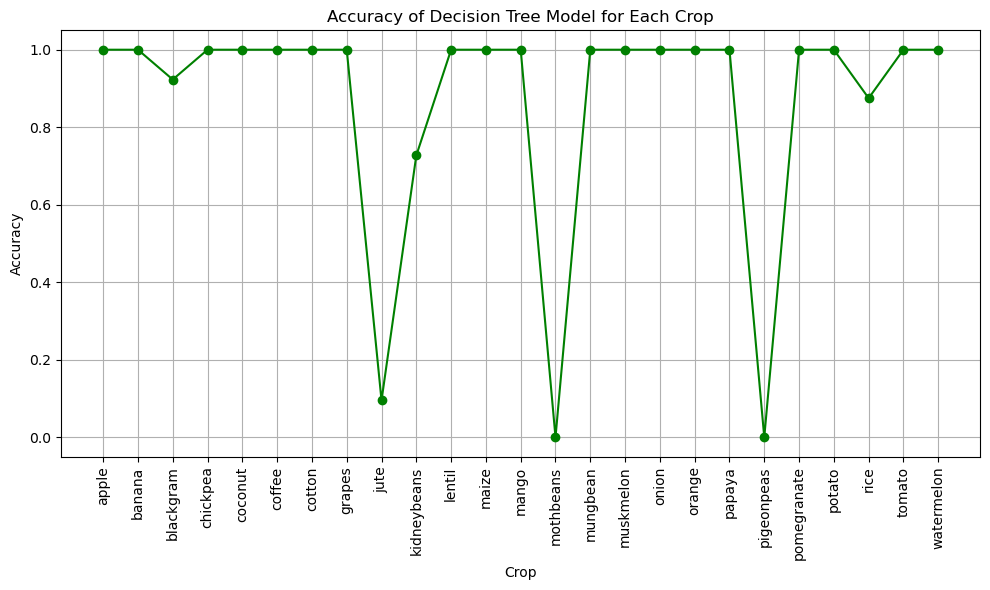

In [51]:
# Initialize and train the Decision Tree model
DT_model = DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5)
DT_model.fit(X_train, y_train)

# Predict crop labels for the testing set
predicted_labels = DT_model.predict(X_test)

# Calculate accuracy for each crop
accuracy_per_crop = []
crop_labels = le.inverse_transform(sorted(np.unique(y_test)))  # Get sorted unique crop labels
for crop_label in crop_labels:
    indices = (y_test == le.transform([crop_label])[0])  # Indices for current crop label
    accuracy = accuracy_score(y_test[indices], predicted_labels[indices])
    accuracy_per_crop.append(accuracy)

# Plot the accuracy of the Decision Tree model for each crop
plt.figure(figsize=(10, 6))
plt.plot(crop_labels, accuracy_per_crop, marker='o', color='green', linestyle='-')
plt.xticks(rotation=90)
plt.title('Accuracy of Decision Tree Model for Each Crop')
plt.ylabel('Accuracy')
plt.xlabel('Crop')
plt.grid(True)
plt.tight_layout()
plt.show()

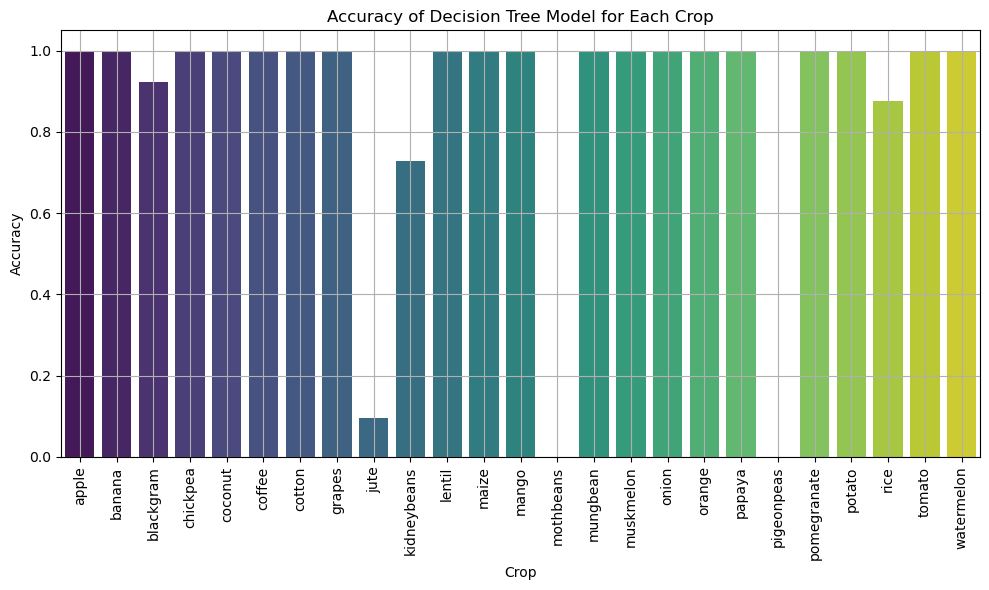

In [52]:
# Initialize and train the Decision Tree model
DT_model = DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5)
DT_model.fit(X_train, y_train)

# Predict crop labels for the testing set
predicted_labels = DT_model.predict(X_test)

# Calculate accuracy for each crop
accuracy_per_crop = []
crop_labels = le.inverse_transform(sorted(np.unique(y_test)))  # Get sorted unique crop labels
for crop_label in crop_labels:
    indices = (y_test == le.transform([crop_label])[0])  # Indices for current crop label
    accuracy = accuracy_score(y_test[indices], predicted_labels[indices])
    accuracy_per_crop.append(accuracy)

# Plot the accuracy of the Decision Tree model for each crop
plt.figure(figsize=(10, 6))
sns.barplot(x=crop_labels, y=accuracy_per_crop, palette='viridis')
plt.xticks(rotation=90)
plt.title('Accuracy of Decision Tree Model for Each Crop')
plt.ylabel('Accuracy')
plt.xlabel('Crop')
plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
data = np.array([[1, 7, 3, 50, 39.90, 3, 70.2]])
prediction = RandomForest.predict(data)
print(prediction)

['orange']


In [54]:
pip install ydata-profiling

In [55]:
from ydata_profiling import ProfileReport
# Create the profile report
profile = ProfileReport(df, title="🌿 Smart Irrigation Data Report", explorative=True)

# Save the report to HTML
profile.to_file("smart_irrigation_EDA_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 381.53it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]